In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization

# 1. Data Importing


In [5]:
import pandas as pd
df = pd.read_csv (r"diabetes.csv")

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 2. Data Pre-Processing 

1. Data Type and conversion
2. Data Manipulation

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
def data_lab(df) :
    if df["Pregnancies"] <= 12 :
        return "data_0-12"
    elif (df["Pregnancies"] > 12) & (df["Pregnancies"] <= 24 ):
        return "data_13-24"
    elif (df["Pregnancies"] > 24) & (df["Pregnancies"] <= 48) :
        return "data_25-48"
    elif (df["Pregnancies"] > 48) & (df["Pregnancies"] <= 60) :
        return "data_49-60"
    elif df["Pregnancies"] > 60 :
        return "data_gt_60"
    
    
df["data_group"] = df.apply(lambda df:data_lab(df),axis = 1)

In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,data_group
0,6,148,72,35,0,33.6,0.627,50,1,data_0-12
1,1,85,66,29,0,26.6,0.351,31,0,data_0-12
2,8,183,64,0,0,23.3,0.672,32,1,data_0-12
3,1,89,66,23,94,28.1,0.167,21,0,data_0-12
4,0,137,40,35,168,43.1,2.288,33,1,data_0-12


# 3. Missing Value Identify & Treatment


In [14]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
data_group                  0
dtype: int64


In [15]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'data_group'],
      dtype='object')

# 4.Outlier identify & Treatment 

<AxesSubplot:ylabel='Pregnancies'>

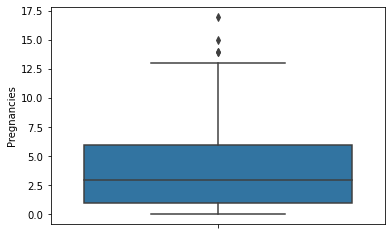

In [16]:
sns.boxplot(y=df.Pregnancies)  # Single Variable

In [18]:
q1 = df['Pregnancies'].quantile(0.25)
q3 = df['Pregnancies'].quantile(0.75)
iqr = q3-q1 #Interquartile range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

13.5

In [19]:
df['Pregnancies']=np.where(df['Pregnancies'] > upper_limit,upper_limit,df['Pregnancies']) 


<AxesSubplot:ylabel='Pregnancies'>

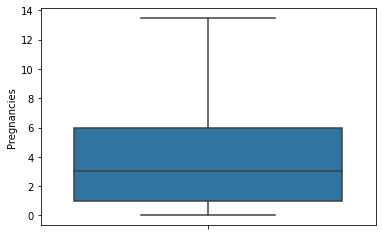

In [20]:
sns.boxplot(y='Pregnancies',data=df)  # Single Variable

<AxesSubplot:ylabel='Glucose'>

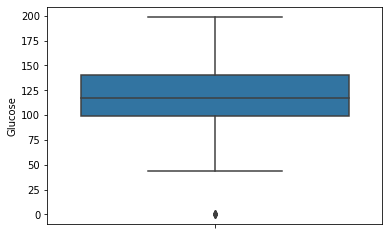

In [21]:
sns.boxplot(y=df.Glucose)  # Single Variable

In [23]:
q1 = df['Glucose'].quantile(0.25)
q3 = df['Glucose'].quantile(0.75)
iqr = q3-q1 #Interquartile range
lower_limit = q1-1.5*iqr #acceptable range
lower_limit

37.125

In [24]:
df['Glucose']=np.where(df['Glucose'] < lower_limit,lower_limit,df['Glucose']) 


<AxesSubplot:ylabel='Glucose'>

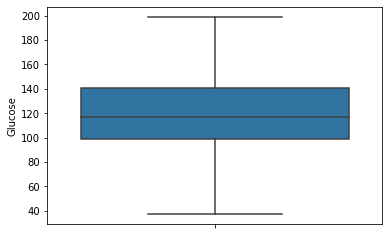

In [26]:
sns.boxplot(y='Glucose',data=df)  # Single Variable

<AxesSubplot:ylabel='BloodPressure'>

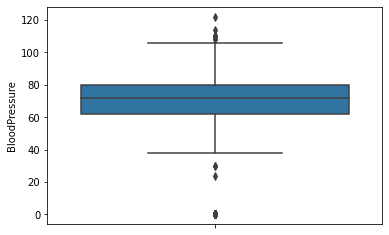

In [27]:
sns.boxplot(y=df.BloodPressure)  # Single Variable

<AxesSubplot:ylabel='BloodPressure'>

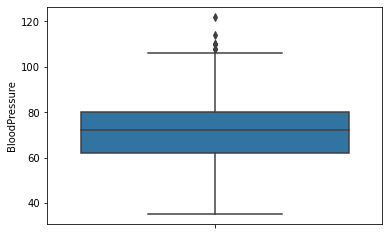

In [28]:
q1 = df['BloodPressure'].quantile(0.25)
q3 = df['BloodPressure'].quantile(0.75)
iqr = q3-q1 #Interquartile range
lower_limit = q1-1.5*iqr #acceptable range
lower_limit
df['BloodPressure']=np.where(df['BloodPressure'] < lower_limit,lower_limit,df['BloodPressure']) 
sns.boxplot(y='BloodPressure',data=df)  # Single Variable

<AxesSubplot:ylabel='BloodPressure'>

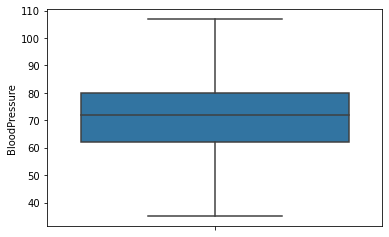

In [29]:
q1 = df['BloodPressure'].quantile(0.25)
q3 = df['BloodPressure'].quantile(0.75)
iqr = q3-q1 #Interquartile range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit
df['BloodPressure']=np.where(df['BloodPressure'] > upper_limit,upper_limit,df['BloodPressure']) 
sns.boxplot(y='BloodPressure',data=df)  # Single Variable

<AxesSubplot:ylabel='SkinThickness'>

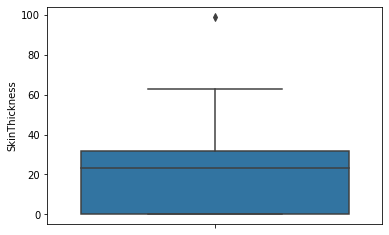

In [30]:
sns.boxplot(y=df.SkinThickness)  # Single Variable

<AxesSubplot:ylabel='SkinThickness'>

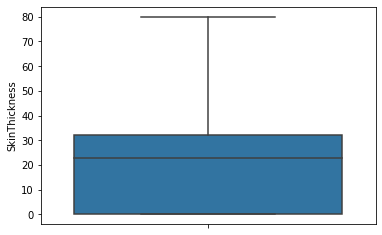

In [31]:
q1 = df['SkinThickness'].quantile(0.25)
q3 = df['SkinThickness'].quantile(0.75)
iqr = q3-q1 #Interquartile range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit
df['SkinThickness']=np.where(df['SkinThickness'] > upper_limit,upper_limit,df['SkinThickness']) 
sns.boxplot(y='SkinThickness',data=df)  # Single Variable

<AxesSubplot:ylabel='Insulin'>

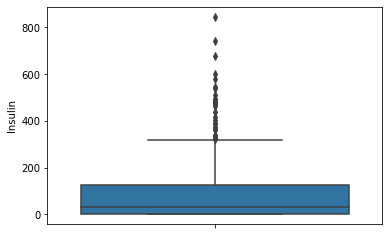

In [32]:
sns.boxplot(y=df.Insulin)  # Single Variable

<AxesSubplot:ylabel='Insulin'>

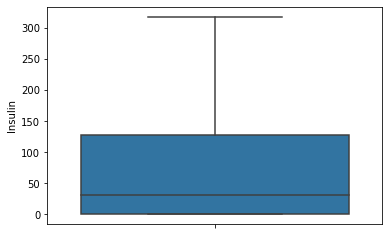

In [33]:
q1 = df['Insulin'].quantile(0.25)
q3 = df['Insulin'].quantile(0.75)
iqr = q3-q1 #Interquartile range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit
df['Insulin']=np.where(df['Insulin'] > upper_limit,upper_limit,df['Insulin']) 
sns.boxplot(y='Insulin',data=df)  # Single Variable

<AxesSubplot:ylabel='BMI'>

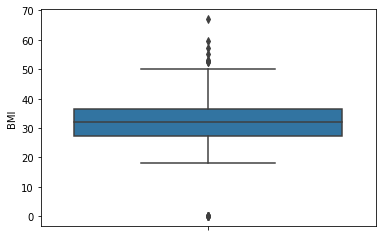

In [35]:
sns.boxplot(y=df.BMI)  # Single Variable

<AxesSubplot:ylabel='BMI'>

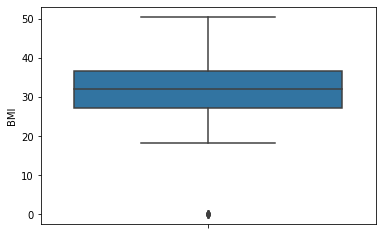

In [36]:
q1 = df['BMI'].quantile(0.25)
q3 = df['BMI'].quantile(0.75)
iqr = q3-q1 #Interquartile range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit
df['BMI']=np.where(df['BMI'] > upper_limit,upper_limit,df['BMI']) 
sns.boxplot(y='BMI',data=df)  # Single Variable

<AxesSubplot:ylabel='BMI'>

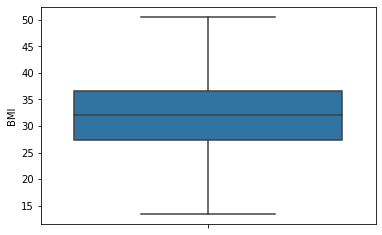

In [37]:
q1 = df['BMI'].quantile(0.25)
q3 = df['BMI'].quantile(0.75)
iqr = q3-q1 #Interquartile range
lower_limit = q1-1.5*iqr #acceptable range
lower_limit
df['BMI']=np.where(df['BMI'] < lower_limit,lower_limit,df['BMI']) 
sns.boxplot(y='BMI',data=df)  # Single Variable

<AxesSubplot:ylabel='DiabetesPedigreeFunction'>

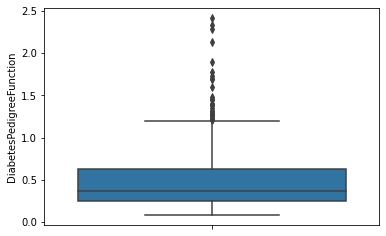

In [38]:
sns.boxplot(y=df.DiabetesPedigreeFunction)  # Single Variable

<AxesSubplot:ylabel='DiabetesPedigreeFunction'>

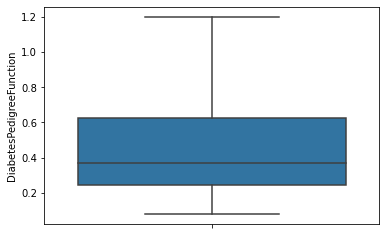

In [39]:
q1 = df['DiabetesPedigreeFunction'].quantile(0.25)
q3 = df['DiabetesPedigreeFunction'].quantile(0.75)
iqr = q3-q1 #Interquartile range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit
df['DiabetesPedigreeFunction']=np.where(df['DiabetesPedigreeFunction'] > upper_limit,upper_limit,df['DiabetesPedigreeFunction']) 
sns.boxplot(y='DiabetesPedigreeFunction',data=df)  # Single Variable

<AxesSubplot:ylabel='Age'>

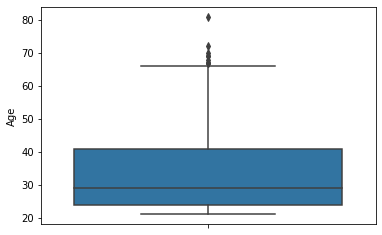

In [40]:
sns.boxplot(y=df.Age)  # Single Variable

<AxesSubplot:ylabel='Age'>

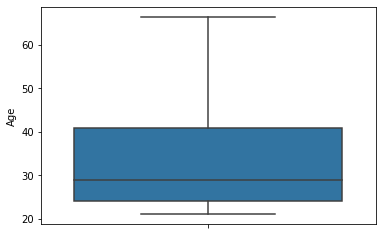

In [41]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3-q1 #Interquartile range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit
df['Age']=np.where(df['Age'] > upper_limit,upper_limit,df['Age']) 
sns.boxplot(y='Age',data=df)  # Single Variable

<AxesSubplot:ylabel='Outcome'>

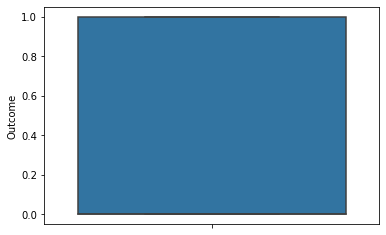

In [42]:
sns.boxplot(y=df.Outcome)  # Single Variable

# Data Visualization

In [45]:
import plotly.express as px

fig = px.pie(df,names='Outcome',color='Outcome',
             color_discrete_map={0:'red',
                                 1:'green'})
fig.show()

# 5.Labeling the data 


In [47]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,data_group
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1,data_0-12
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0,data_0-12
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1,data_0-12
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,data_0-12
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1,data_0-12


In [50]:
df=df.drop('BloodPressure',axis=1)

In [51]:
df.select_dtypes(include=[np.number]).columns.tolist()

['Glucose',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [52]:
df_num = df[df.select_dtypes(include=[np.number]).columns.tolist()]
df_num.head(3)

,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148.0,35.0,0.0,33.6,0.627,50.0,1
1,85.0,29.0,0.0,26.6,0.351,31.0,0
2,183.0,0.0,0.0,23.3,0.672,32.0,1


In [53]:
df_dummies = df[df.select_dtypes(include=['object']).columns.tolist()]
df_dummies.head(3)

,data_group
0,data_0-12
1,data_0-12
2,data_0-12


In [54]:
from sklearn.preprocessing import LabelEncoder
df_dummies=df_dummies.apply(LabelEncoder().fit_transform)
df_dummies.head(3)
# label in ascending order

,data_group
0,0
1,0
2,0


In [55]:
df= pd.concat([df_num, df_dummies],axis=1)
df.head()

,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,data_group
0,148.0,35.0,0.0,33.6,0.627,50.0,1,0
1,85.0,29.0,0.0,26.6,0.351,31.0,0,0
2,183.0,0.0,0.0,23.3,0.672,32.0,1,0
3,89.0,23.0,94.0,28.1,0.167,21.0,0,0
4,137.0,35.0,168.0,43.1,1.200,33.0,1,0


# Data Partition 


In [56]:
from sklearn.model_selection import train_test_split

# define our input variable (X) & output variable
X = df.drop('Outcome', axis = 1)
Y = df[['Outcome']]
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1234)

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# by default 100 tree will be form 
Model = RandomForestClassifier(n_estimators=20, # make 20 tress
                               criterion="gini",
                               max_depth=4,  # each tree will have 4 branches
                               min_samples_split=100,# each tree will have parent node
                               min_samples_leaf=50,# each tree will have Child node
                               max_features="sqrt")# n_estimators means number tree we want  

Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=50,
                       min_samples_split=100, n_estimators=20)

# Importance Features

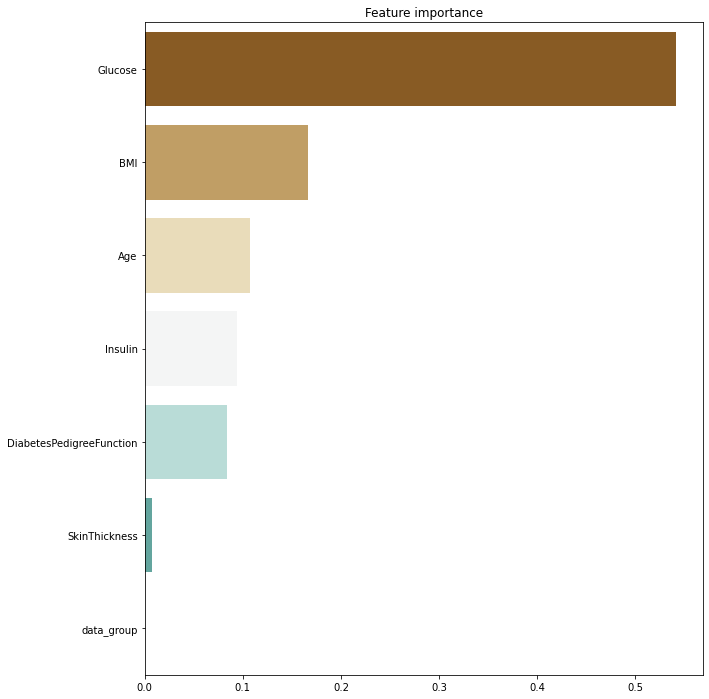

In [58]:
# Plot features importances
imp = pd.Series(data=Model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="BrBG", orient='h')


# Random Forest Visualization

In [59]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

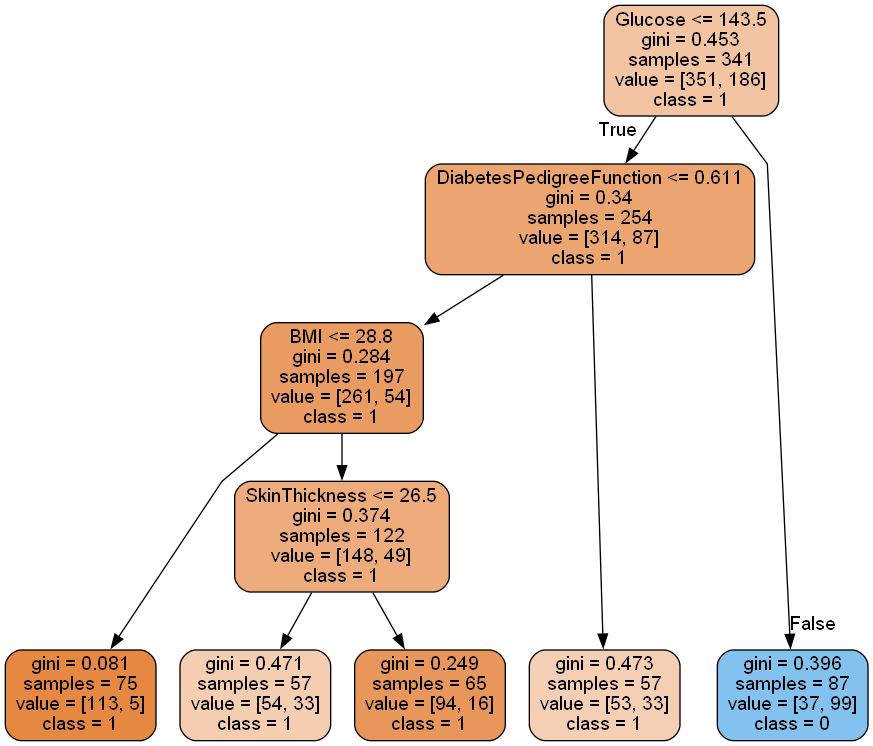

In [60]:
tree = Model.estimators_[1]  # specify the tree number   
Outcome=['1','0'] 
# Export the image to a dot file
feature_list = list(X.columns)  # all variable name
export_graphviz(tree, out_file = 'abc.dot', 
                feature_names = feature_list, 
                leaves_parallel=True,
                class_names=Outcome,
                rounded = True, 
                filled=True)
# Use dot file to create a graph
(graph,)= pydot.graph_from_dot_file('abc.dot')
# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image
Image(filename = 'tree.png')

# Step 6 : Predictions on Train Dataset


In [61]:
train=pd.concat([X_train,y_train],axis=1)
train.head()

,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,data_group,Outcome
113,76.0,0.0,0.0,34.0,0.391,25.0,0,0
395,127.0,24.0,275.0,27.7,1.200,25.0,0,0
453,119.0,0.0,0.0,19.6,0.832,66.5,0,0
401,137.0,0.0,0.0,24.2,0.151,55.0,0,0
245,184.0,15.0,0.0,30.0,1.200,49.0,0,1


In [63]:
train['Predicted']=Model.predict(X_train)
df.head()

,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,data_group
0,148.0,35.0,0.0,33.6,0.627,50.0,1,0
1,85.0,29.0,0.0,26.6,0.351,31.0,0,0
2,183.0,0.0,0.0,23.3,0.672,32.0,1,0
3,89.0,23.0,94.0,28.1,0.167,21.0,0,0
4,137.0,35.0,168.0,43.1,1.200,33.0,1,0


# Step 7 : Model Performance Metrics

In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(train['Outcome'], train['Predicted'])
print(confusion_matrix)

[[325  28]
 [ 82 102]]


In [65]:
Accuracy_Train=((325+102)/(537)*100)
print(Accuracy_Train)

79.51582867783985


In [66]:
from sklearn.metrics import classification_report
print(classification_report(train['Outcome'], train['Predicted']))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       353
           1       0.78      0.55      0.65       184

    accuracy                           0.80       537
   macro avg       0.79      0.74      0.75       537
weighted avg       0.79      0.80      0.78       537



# Step 8 : Predictions on Test Dataset

In [67]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,data_group,Outcome
200,113.0,16.0,0.0,31.0,0.874,21.0,0,0
40,180.0,25.0,70.0,34.0,0.271,26.0,0,0
630,114.0,0.0,0.0,27.4,0.732,34.0,0,1
356,125.0,40.0,167.0,33.3,0.962,28.0,0,1
305,120.0,37.0,105.0,39.7,0.215,29.0,0,0


In [68]:
test['Predicted']=Model.predict(X_test)
test.head()

,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,data_group,Outcome,Predicted
200,113.0,16.0,0.0,31.0,0.874,21.0,0,0,0
40,180.0,25.0,70.0,34.0,0.271,26.0,0,0,1
630,114.0,0.0,0.0,27.4,0.732,34.0,0,1,0
356,125.0,40.0,167.0,33.3,0.962,28.0,0,1,0
305,120.0,37.0,105.0,39.7,0.215,29.0,0,0,0


# Step 9 : Model Performance Metrics on Test data 

In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Outcome'])
print(confusion_matrix)

[[134  50]
 [ 13  34]]


In [70]:
Accuracy_test=((134+34)/(231)*100)
Accuracy_test

72.72727272727273

In [71]:
from sklearn.metrics import classification_report
print(classification_report(test['Outcome'], test['Predicted']))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       147
           1       0.72      0.40      0.52        84

    accuracy                           0.73       231
   macro avg       0.73      0.66      0.66       231
weighted avg       0.73      0.73      0.70       231



# Finish